SSIM Score: 0.9691231395439726


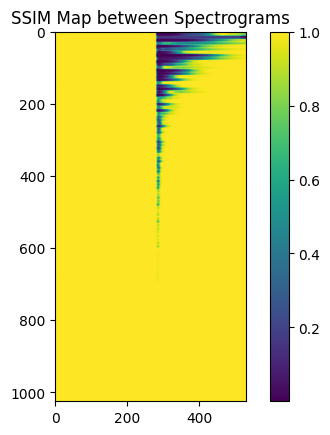

In [ ]:
import librosa
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

y1, sr1 = librosa.load('./audios/G4_guitar.mp3', sr=None)
y2, sr2 = librosa.load('./audios/G4_guitar_Delay_high.mp3', sr=None)

# Ensure both audio files have the same sample rate
if sr1 != sr2:
    raise ValueError("Sample rates of the two audio files do not match!")

# Compute spectrograms
S1 = np.abs(librosa.stft(y1))
S2 = np.abs(librosa.stft(y2))

# Pad the smaller spectrogram to match the shape of the larger one
if S1.shape != S2.shape:
    target_shape = (
        max(S1.shape[0], S2.shape[0]),
        max(S1.shape[1], S2.shape[1])
    )

    # Function to pad the spectrogram to the target shape
    def pad_to_shape(spectrogram, target_shape):
        pad_height = target_shape[0] - spectrogram.shape[0]
        pad_width = target_shape[1] - spectrogram.shape[1]
        return np.pad(spectrogram, 
                      ((0, pad_height), (0, pad_width)), 
                      mode='constant', constant_values=0)

    # Apply padding
    S1 = pad_to_shape(S1, target_shape)
    S2 = pad_to_shape(S2, target_shape)

# Normalize the spectrograms
S1_norm = (S1 - S1.min()) / (S1.max() - S1.min())
S2_norm = (S2 - S2.min()) / (S2.max() - S2.min())

# Compute SSIM
ssim_score, ssim_map = ssim(S1_norm, S2_norm, data_range=1.0, full=True)
print(f"SSIM Score: {ssim_score}")

# Display SSIM map (optional)
plt.imshow(ssim_map, cmap='viridis')
plt.colorbar()
plt.title("SSIM Map between Spectrograms")
plt.show()
